In [2]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing_part_synthetic_dataset import *
from cv_fold_part import *
from eval_part import *
from prepare_training_part import *
from training_part import *
from utils import *
from kde_part import *
from models import *
import os


print("imports done")
np.set_printoptions(threshold=np.inf)
colors_map = {"baseline":"black","linear":"orange","cnn_sum":"gold","cnn_pure":"red"}

imports done
imports done
imports done
imports done


In [3]:
np.random.seed(42)
domains_xs, domains_ys = create_synthetic_dataset(100, 200)
np.random.seed(42)
domains_emb = kde_part(domains_xs, kernel="gaussian", bandwidth=0.03, points=100)
np.random.seed(42)
splits = cv_fold_part(100, 4)

0


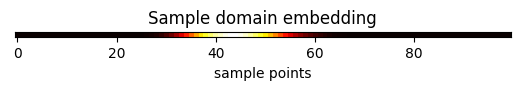

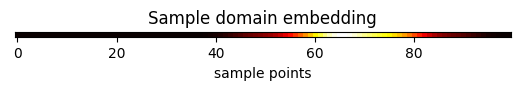

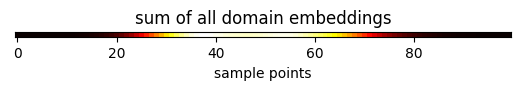

In [6]:
diff_domains = []
for i in domains_emb:
    for j in i:
        diff_domains.append(j[0])
diff_domains = np.array(diff_domains)

def show_diff_domains(nr):
    plt.imshow(diff_domains[nr], cmap="hot")
    plt.title(f"Examplary domain embedding")
    plt.xlabel("sample points")
    plt.yticks([])
    plt.show()

show_diff_domains(0)
show_diff_domains(1)
plt.imshow(np.sum(diff_domains, axis=0), cmap="hot")
plt.title("sum of all domain embeddings")
plt.xlabel("sample points")
plt.yticks([])
plt.show()

In [38]:
# torch.manual_seed(42)
# np.random.seed(42)
# device="mps"
# experiment_name = "synthetic"


# for s,split in enumerate(splits):
#     model_list = []
#     # baseline model
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="baseline",
#         feature_size=0,
#         embedding_size=0,
#         embedding_nr_layers=0,
#         embedding_neurons=0,
#         embedding_head_class=head_empty,
#         hidden_size=0,
#         evaluation_input_size=1,
#         evaluation_nr_layers=1,
#         evaluation_neurons=100,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="baseline",
#         feature_size=0,
#         embedding_size=0,
#         embedding_nr_layers=0,
#         embedding_neurons=0,
#         embedding_head_class=head_empty,
#         hidden_size=0,
#         evaluation_input_size=1,
#         evaluation_nr_layers=3,
#         evaluation_neurons=400,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #sum - in correct order (best to worst)
#     # model_list.append(
#     #     model_embedding_and_input(
#     #     experiment_name=experiment_name,
#     #     model_name="column",
#     #     feature_size=100,
#     #     embedding_size=1,
#     #     embedding_nr_layers=1,
#     #     embedding_neurons=100,
#     #     embedding_head_class=head_linear,
#     #     hidden_size=5,
#     #     evaluation_input_size=6,
#     #     evaluation_nr_layers=1,
#     #     evaluation_neurons=100,
#     #     evaluation_head_class=head_linear,
#     #     output_size=1,
#     # ))
    
#     # model_list.append(
#     #     model_embedding_and_input(
#     #     experiment_name=experiment_name,
#     #     model_name="column",
#     #     feature_size=100,
#     #     embedding_size=1,
#     #     embedding_nr_layers=3,
#     #     embedding_neurons=400,
#     #     embedding_head_class=head_linear,
#     #     hidden_size=5,
#     #     evaluation_input_size=6,
#     #     evaluation_nr_layers=3,
#     #     evaluation_neurons=400,
#     #     evaluation_head_class=head_linear,
#     #     output_size=1,
#     # ))
#     train_loader, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     training_part(train_loader, test1_loader, test2_loader,early_stopping=50,max_epochs=10000, lr=0.001, split_nr=s,model_list = model_list,device=device)

In [39]:
# torch.manual_seed(42)
# np.random.seed(42)
# all_split_data = []
# experiment_name = "synthetic"

# all_models = os.listdir("models")
# model_names = [m[:-7] for m in all_models if m.startswith(experiment_name)]
# model_names = sorted(list(set(model_names)))

# print(len(model_names),model_names)

# for s,split in enumerate(splits):
#     _, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     s_res1 = eval_part(test_loader = test1_loader,test_loader_nr = 1, path_to_models = "models",model_names = model_names, split_nr=s)
#     s_res2 = eval_part(test_loader = test2_loader,test_loader_nr = 0, path_to_models = "models",model_names = model_names, split_nr=s)
#     print(s_res1)
#     print(s_res2)
#     all_split_data.append(s_res1)
#     all_split_data.append(s_res2)

# evaluation_results = np.array(all_split_data)
# # np.save("synthethic_evaluation_results.npy",evaluation_results)

In [40]:
# models = os.listdir("models")
# model_names = [m for m in models if m.startswith("synthetic-row")]
# print(len(model_names),model_names)
# new_model_names = ["synthetic-linear|"+i.split("|")[1] for i in model_names]
# print(len(new_model_names),new_model_names)

# for n,i in enumerate(model_names):
#     os.rename("models/"+i,"models/"+new_model_names[n])

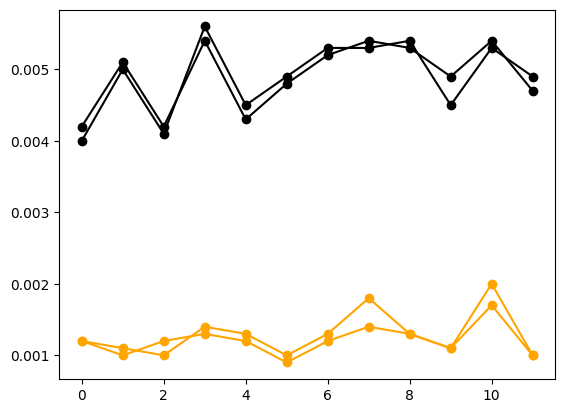

[0.00490833 0.0049     0.00126667 0.00123333]


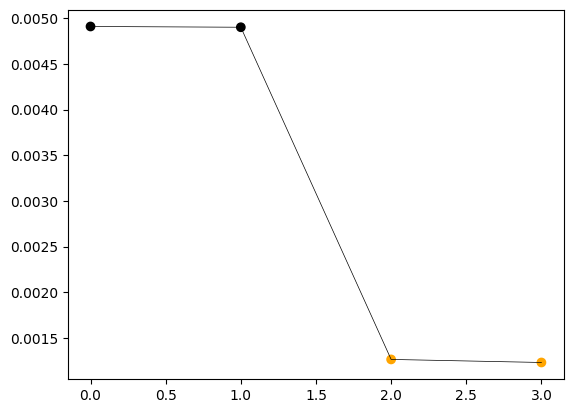

In [41]:
evaluation_results = np.load("synthethic_evaluation_results.npy")

experiment_name = "synthetic"
all_models = os.listdir("models")
model_names = [m[:-7] for m in all_models if m.startswith(experiment_name)]
model_names = sorted(list(set(model_names)))
types = [i.split("|")[0].split("-")[1] for i in model_names]
colors = [colors_map[i] for i in types]

for i in range(len(model_names)):
    plt.plot(evaluation_results[:,i],marker="o", label=model_names[i],color=colors[i])

plt.show()

plt.plot(np.mean(evaluation_results,axis=0), label="model_with_parallel_embedding_parkinson",color="black",linewidth=0.5)
plt.scatter(np.arange(len(model_names)),np.mean(evaluation_results,axis=0),color=colors)
print(np.mean(evaluation_results,axis=0))
plt.show()